In [68]:
# Importing the data Question # 
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/Data_assignment.csv')


In [69]:
df

,Date,stats
0,2001 JAN,7.5
1,2001 FEB,11.7
2,2001 MAR,5.0
3,2001 APR,7.6
4,2001 MAY,5.0
...,...,...
259,2022 AUG,7.4
260,2022 SEP,7.2
261,2022 OCT,7.2
262,2022 NOV,8.4


In [70]:

# Convert the relevant column to a numpy array
values = df['stats'].to_numpy()


In [ ]:
# Question  1

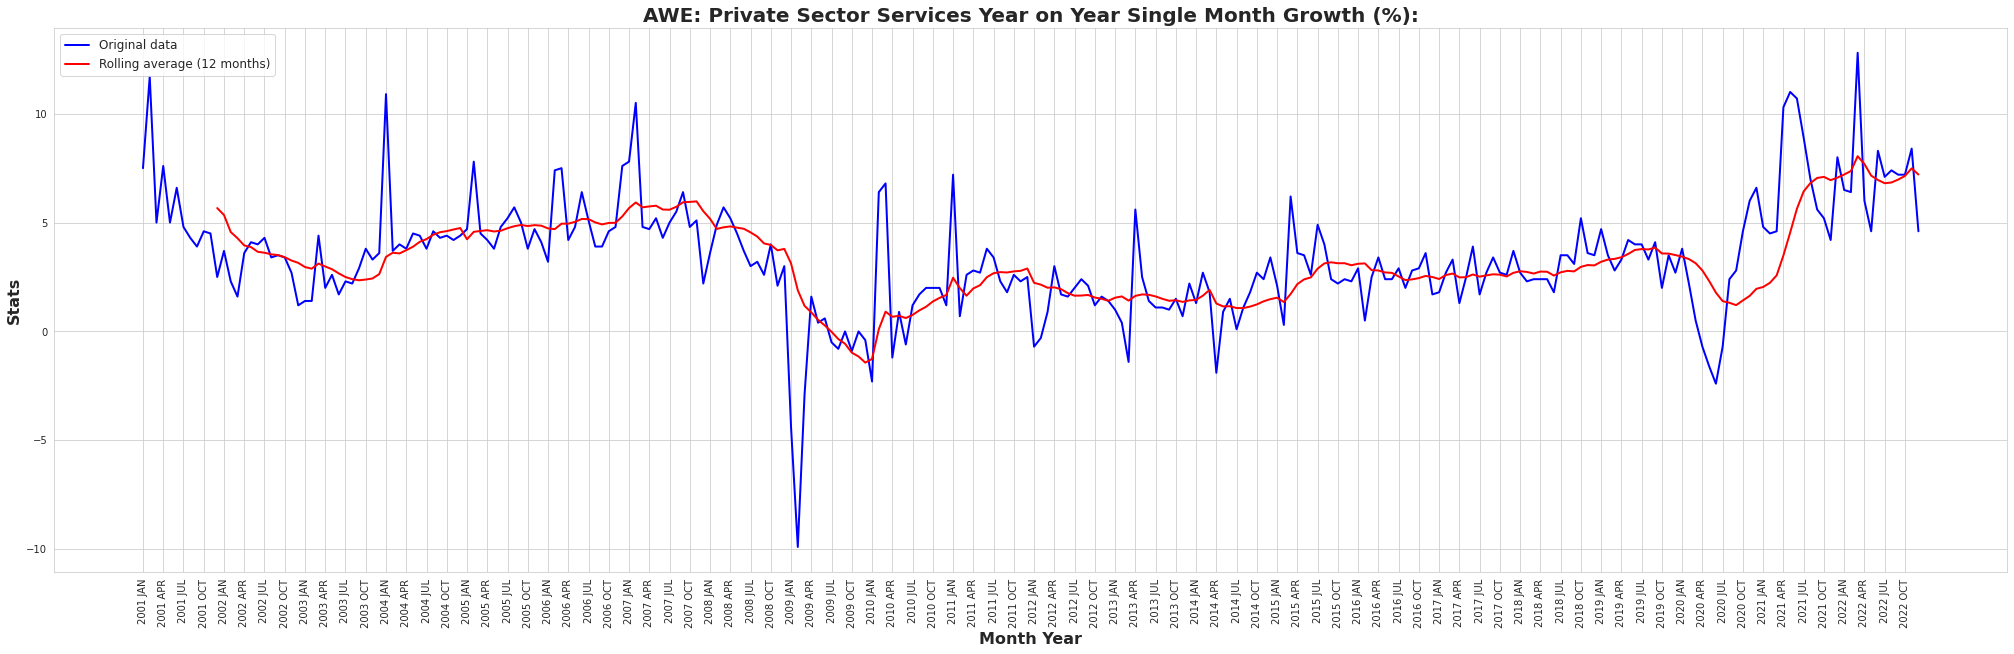

In [71]:
import numpy as np

# Set the window size for the rolling average
window = 12

# Calculate the rolling average using a window of size `window`
rolling_avg = np.convolve(values, np.ones(window)/window, mode='valid')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(35, 10))

# Plot the original time series data
ax.plot(df['Date'], values, color='blue', linewidth=2, label='Original data')

# Plot the rolling average data
ax.plot(df['Date'].iloc[window-1:], rolling_avg, color='red', linewidth=2, label=f'Rolling average ({window} months)')

# Set the title and axis labels with bold font
ax.set_title('AWE: Private Sector Services Year on Year Single Month Growth (%):', fontsize=20, fontdict={'fontweight': 'bold'})
ax.set_xlabel('Month Year', fontsize=16, fontdict={'fontweight': 'bold'})
ax.set_ylabel('Stats', fontsize=16, fontdict={'fontweight': 'bold'})
# Specify the step value for x-tick labels
step = 3
ax.xaxis.set_major_locator(ticker.IndexLocator(base=step, offset=0))

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)
# Add a legend to the plot
ax.legend(fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()


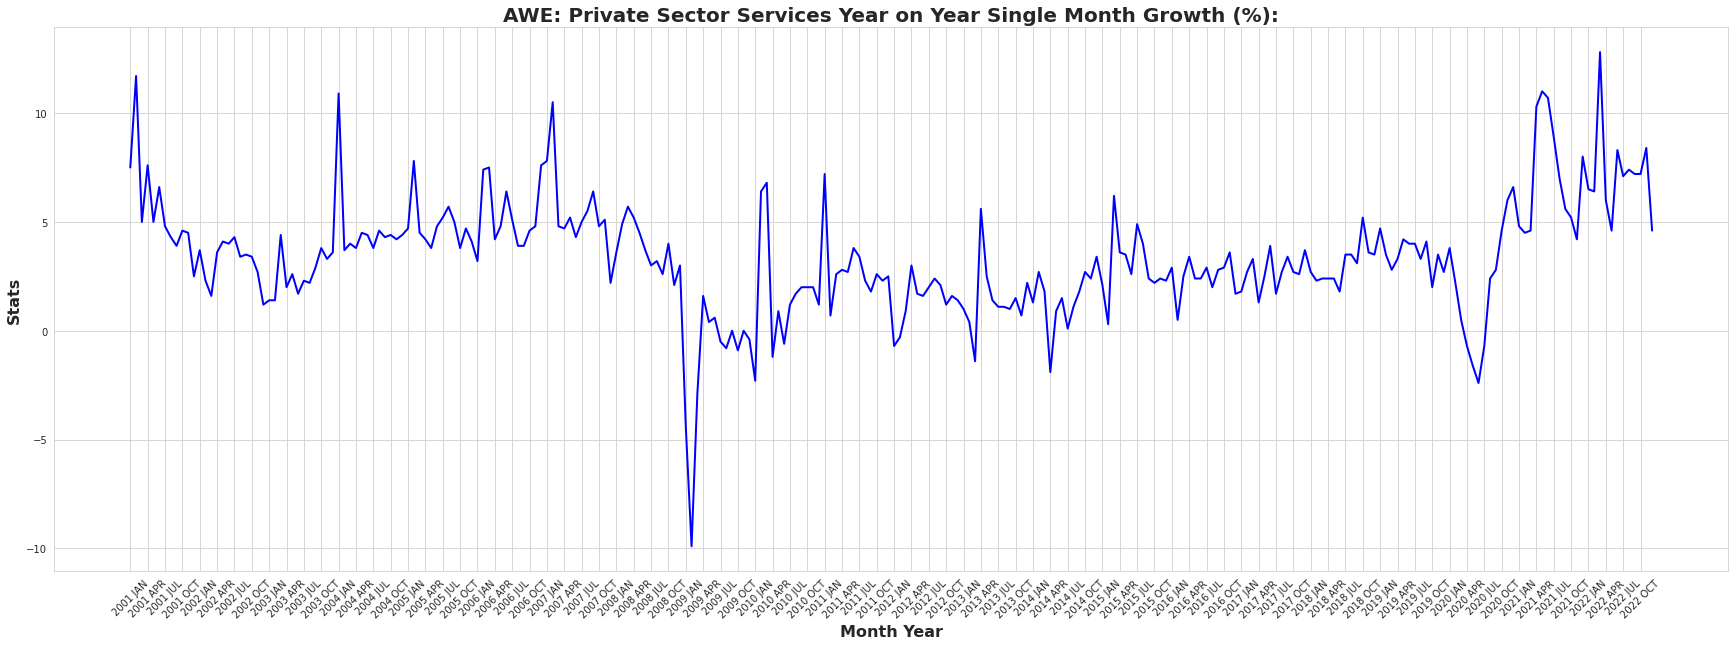

In [72]:
import matplotlib.ticker as ticker

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(30, 10))


# Plot the time series data
ax.plot(df['Date'], values, color='blue', linewidth=2)

# Set the title and axis labels with bold font
ax.set_title('AWE: Private Sector Services Year on Year Single Month Growth (%):', fontsize=20, fontdict={'fontweight': 'bold'})
ax.set_xlabel('Month Year', fontsize=16, fontdict={'fontweight': 'bold'})
ax.set_ylabel('Stats', fontsize=16, fontdict={'fontweight': 'bold'})

# Specify the step value for x-tick labels
step = 3
ax.xaxis.set_major_locator(ticker.IndexLocator(base=step, offset=0))

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()


In [73]:
import plotly.graph_objects as go

# Create a scatter trace with lines mode
trace = go.Scatter(x=df['Date'], y=values, mode='lines', line=dict(color='blue', width=2))

# Set the title and axis labels
layout = go.Layout(title='AWE: Private Sector Services Year on Year Single Month Growth (%):', xaxis=dict(title='Month Year'), yaxis=dict(title='Stats'))

# Create the figure and plot the trace
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [74]:
import plotly.graph_objects as go

# Set the window size for the rolling average
window = 12

# Calculate the rolling average using a window of size `window`
rolling_avg = np.convolve(values, np.ones(window)/window, mode='valid')

# Set up the figure and axis
fig = go.Figure()

# Plot the original time series data
fig.add_trace(go.Scatter(x=df['Date'], y=values, mode='lines', name='Original data', line=dict(color='blue', width=2)))

# Plot the rolling average data
fig.add_trace(go.Scatter(x=df['Date'].iloc[window-1:], y=rolling_avg, mode='lines', name=f'Rolling average ({window} months)', line=dict(color='red', width=2)))

# Set the title and axis labels with bold font
fig.update_layout(title=dict(text='Average Rolling  AWE: Private Sector Services Year on Year Single Month Growth (%):', font=dict(size=20, color='black')),
                  xaxis=dict(title='Month Year', title_font=dict(size=16, color='black')),
                  yaxis=dict(title='Stats', title_font=dict(size=16, color='black')))

# Specify the step value for x-tick labels
step = 3
fig.update_xaxes(tickmode='linear', dtick=step)

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=90)

# Display the plot
fig.show()


In [75]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Remove the rolling average data
values = values[window-1:]

# Calculate the exponential smoothing
exp_smooth = sm.tsa.SimpleExpSmoothing(values).fit().fittedvalues

# Set up the figure and axis
fig = go.Figure()

# Plot the original time series data
fig.add_trace(go.Scatter(x=df['Date'], y=values, mode='lines', name='Original data', line=dict(color='blue', width=2)))

# Plot the exponential smoothing line
fig.add_trace(go.Scatter(x=df['Date'].iloc[window:], y=exp_smooth, mode='lines', name='Exponential smoothing', line=dict(color='green', width=2)))

# Set the title and axis labels with bold font
fig.update_layout(title=dict(text='Exponential Smoothing AWE: Private Sector Services Year on Year Single Month Growth (%):', font=dict(size=20, color='black')),
                  xaxis=dict(title='Month Year', title_font=dict(size=16, color='black')),
                  yaxis=dict(title='Stats', title_font=dict(size=16, color='black')))

# Specify the step value for x-tick labels
step = 3
fig.update_xaxes(tickmode='linear', dtick=step)

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=90)

# Display the plot
fig.show()


In [76]:
import numpy as np
import plotly.graph_objects as go

# Compute the finite differences of the values
diffs = np.diff(values)

# Set up the figure and axis
fig = go.Figure()

# Plot the finite differences
fig.add_trace(go.Scatter(x=df['Date'].iloc[1:], y=diffs, mode='lines', name='Finite Differences', line=dict(color='blue', width=2)))

# Set the title and axis labels with bold font
fig.update_layout(title=dict(text='Finite Differences of AWE: Private Sector Services Year on Year Single Month Growth (%):', font=dict(size=20, color='black')),
                  xaxis=dict(title='Month Year', title_font=dict(size=16, color='black')),
                  yaxis=dict(title='Differences', title_font=dict(size=16, color='black')))

# Specify the step value for x-tick labels
step = 3
fig.update_xaxes(tickmode='linear', dtick=step)

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=90)

# Display the plot
fig.show()


In [77]:
df

,Date,stats
0,2001 JAN,7.5
1,2001 FEB,11.7
2,2001 MAR,5.0
3,2001 APR,7.6
4,2001 MAY,5.0
...,...,...
259,2022 AUG,7.4
260,2022 SEP,7.2
261,2022 OCT,7.2
262,2022 NOV,8.4


In [78]:
data = df

# Convert the relevant column to a numpy array
values = df['stats'].to_numpy()

In [79]:
df = data

In [80]:
df

,Date,stats
0,2001 JAN,7.5
1,2001 FEB,11.7
2,2001 MAR,5.0
3,2001 APR,7.6
4,2001 MAY,5.0
...,...,...
259,2022 AUG,7.4
260,2022 SEP,7.2
261,2022 OCT,7.2
262,2022 NOV,8.4


In [81]:
# Load the data from the CSV file
df = pd.read_csv('/content/Data_assignment.csv')
# Convert the relevant column to a numpy array
Stats = df['stats'].to_numpy()

# Set date column as index
df.set_index('Date', inplace=True)



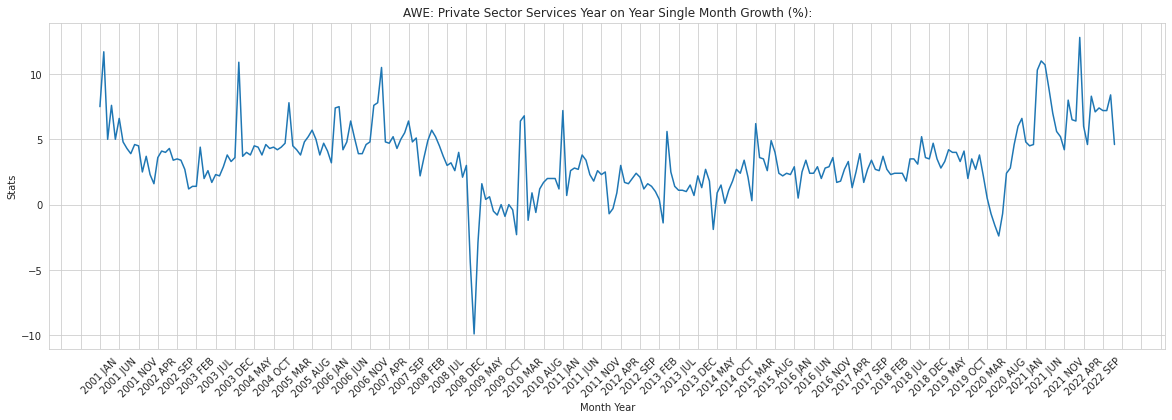

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the time series data
sns.lineplot(data=df, x=df.index, y="stats", ax=ax)

# Set the title and axis labels
ax.set_title('AWE: Private Sector Services Year on Year Single Month Growth (%):')
ax.set_xlabel('Month Year')
ax.set_ylabel('Stats')

# Specify the step value for x-tick labels
step = 4
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df.index)//step))

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()


In [83]:
import pandas as pd
import plotly.graph_objects as go



# Set up the figure and axis
fig = go.Figure()

# Plot the time series data
fig.add_trace(go.Scatter(x=df.index, y=df['stats'], mode='lines'))

# Set the title and axis labels
fig.update_layout(title=dict(text='AWE: Private Sector Services Year on Year Single Month Growth (%):'),
                  xaxis=dict(title='Month Year'),
                  yaxis=dict(title='Stats'))

# Specify the step value for x-tick labels
step = 4
fig.update_xaxes(tickmode='linear', dtick=step)

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=90)

# Display the plot
fig.show()
